<font color="white">.</font> | <font color="white">.</font> | <font color="white">.</font>
-- | -- | --
![NASA](http://www.nasa.gov/sites/all/themes/custom/nasatwo/images/nasa-logo.svg) | <h1><font size="+3">ASTG Python Courses</font></h1> | ![NASA](https://www.nccs.nasa.gov/sites/default/files/NCCS_Logo_0.png)

---

<CENTER>
<H1 style="color:red">
Introduction to Cartopy
</H1>
</CENTER>

## Reference Documents

* <A HREF="https://scitools.org.uk/cartopy/docs/latest/">Introduction --- Cartopy</A>
* <A HREF="https://rabernat.github.io/research_computing_2018/maps-with-cartopy.html">Maps with Cartopy</A>
* <A HREF="https://geohackweek.github.io/visualization/03-cartopy/">Basics: Quick + Simple maps with cartopy.</A>
* <A HREF="https://uoftcoders.github.io/studyGroup/lessons/python/cartography/lesson/">Cartography and Mapping in Python</A>
* <A HREF="https://www.earthdatascience.org/workshops/gis-open-source-python/intro-vector-data-python/">Introduction to Vector Format Spatial Data - Points, Lines and Polygons</A>
* <a href="https://coderzcolumn.com/tutorials/data-science/cartopy-basic-maps-scatter-map-bubble-map-and-connection-map">Cartopy - Basic Maps [Scatter Map, Bubble Map & Connection Map]</a>

## What is Cartopy?

* A Python package which provides a set of tools for creating projection-aware geospatial plots using the Python’s standard plotting package, `Matplotlib`.
* Package for drawing maps for for data analysis and visualization,
* Relies on the `PROJ.4`, `Numpy` and `shapely` libraries.
* Has a simple and intuitive drawing interface to Matplotlib.

## What Does Cartopy Provide?

* Facilities to transform coordinates to different <a href="https://scitools.org.uk/cartopy/docs/latest/crs/projections.html#cartopy-projections">map projections</a>
* `Matplotlib` is used to plot contours, images, vectors, lines or points in the transformed coordinates.
* Shorelines, river and political boundary datasets.
* Facilities for reading shapefiles.

Cartopy has two main building blocks:

1. **Projections (`cartopy.crs`):** A utility that provides the ability to define, and transform data among, cartographic projections. The `cartopy.crs` module (CRS = coordinate reference system a.k.a. projection) defines a set of projections which are useful in defining the desired projection of a plot. These projections augment the machinery of `Matplotlib` to allow for geospatial plots.
2. **Features (`cartopy.feature`):** A module for accessing geospatial data files, like shapefiles or GeoJSON. It has a convenient set of data loaders for adding context to maps (like coastlines, borders, place names, etc.). 

## Recall:  <a href="https://realpython.com/python-matplotlib-guide/">The Matplotlib Object Hierarchy</a>

- When we issue the call `plt.plot(x, y)`, we internally creates a hierarchy of nested Python objects: **Figure** and **Axes**.
- A **Figure** object is the outermost container for a matplotlib graphic, which can contain multiple **Axes** objects.
- An **Axes** actually translates into what we think of as an individual plot or graph (rather than the plural of “axis,” as we might expect).
- Below the Axes in the hierarchy are smaller objects such as tick marks, individual lines, legends, and text boxes. Almost every “element” of a chart is its own manipulable Python object, all the way down to the ticks and labels

![FIG_AXES](https://files.realpython.com/media/fig_map.bc8c7cabd823.png)
Image Source: Brad Solomon (Real Python Tutorial)

Below is a figure anatomy of the Matplotlib object hierarchy:

![Anatomy](https://files.realpython.com/media/anatomy.7d033ebbfbc8.png)
Image Source: Brad Solomon (Real Python Tutorial)

---

### <font color='red'> Only run the following cell if you are on Google Colab</font>

Uncomment the cell below if you are on Google Colab. Unfortunately this might no longer work.

In [ ]:
!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install cython
!pip install cartopy

In [ ]:
!apt-get -qq install python-cartopy python3-cartopy
!pip uninstall -y shapely    # cartopy and shapely aren't friends (early 2020)
!pip install shapely --no-binary shapely

***

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm

import numpy as np

import cartopy
import cartopy.crs as ccrs                   # for projections
import cartopy.feature as cfeature           # for features
import cartopy.io.shapereader as shapereader
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.feature.nightshade import Nightshade

In [9]:
print(cartopy.__version__)

0.19.0.post1


### Drawing Maps

<font color="blue">Simple Scatter Plot</font>

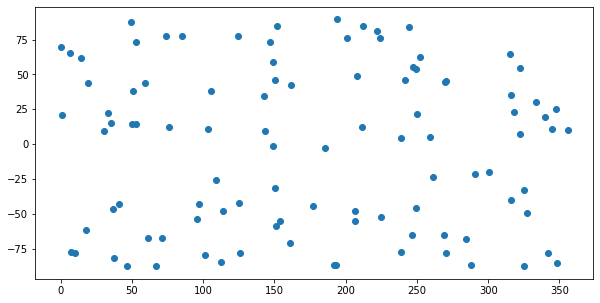

In [12]:
np.random.seed(1)
x = 360 * np.random.rand(100)
y = 180 * np.random.rand(100) - 90

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)

ax.scatter(x, y)

<font color="blue">Add Basic Map on top of the Scatter Plot</font>

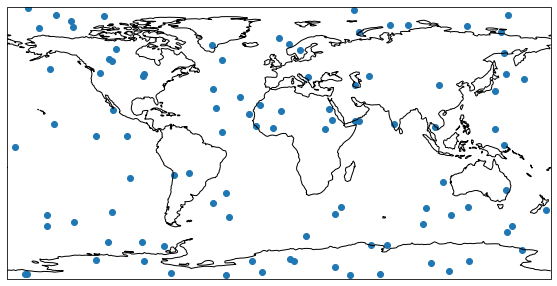

In [11]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.scatter(x, y)
ax.coastlines()

<font color="blue">Add Land Ocean Image</font>

We can introduce natural earth look to the plot by calling the `stock_img()` method on the axes object.

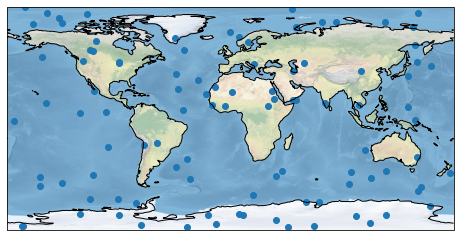

In [13]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1,
                     projection=ccrs.PlateCarree())
ax.scatter(x, y)
ax.stock_img()
ax.coastlines()

#### Add Features to the Map

We add features by calling the `add_feature()` method on-axis object and passing a feature object available from the `cartopy.feature` module.

We can add the following features (part of `cartopy.feature`) to our map:

- `COASTLINE`: Adds coastline around all continents. 
- `LAND`: Adds land on top of world map. 
- `LAKES`: Adds big lakes of the world. 
- `BORDERS`: Adds country borders for the whole world. 
- `OCEAN`: Adds ocean with a color.
- `RIVERS`: Adds big rivers of the world.
- `STATES`: Adds state boundary for the US.

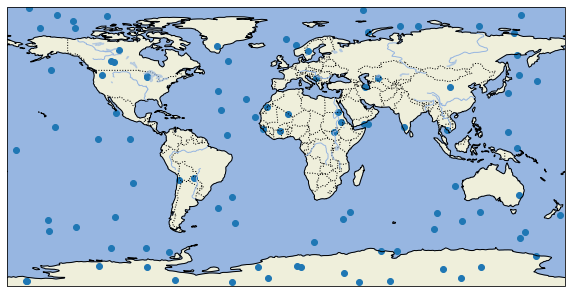

In [14]:
fig = plt.figure(figsize=(10, 7))

# Select the map projection
ax = fig.add_subplot(1, 1, 1,
                     projection=ccrs.PlateCarree())
ax.scatter(x, y)

# Add land
ax.add_feature(cartopy.feature.LAND)

# Add ocean
ax.add_feature(cartopy.feature.OCEAN)

# Add cost lines
ax.add_feature(cartopy.feature.COASTLINE)

# Add country boundaries
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')

# Add lakes
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)

# Add rivers
ax.add_feature(cartopy.feature.RIVERS)
plt.show()

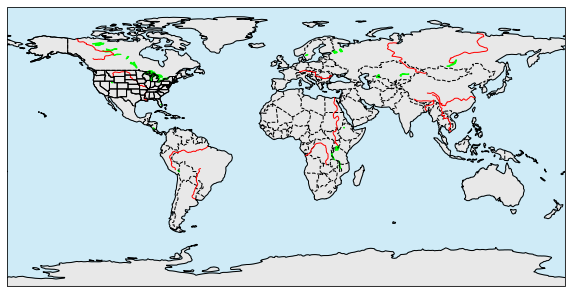

In [15]:
fig = plt.figure(figsize=(10, 7))

central_longitude = 40.0 # default value is zero
# Select the map projection
ax = fig.add_subplot(1, 1, 1,
                     projection=ccrs.PlateCarree())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND, color="lightgrey", alpha=0.5)
ax.add_feature(cfeature.LAKES, color="lime")
ax.add_feature(cfeature.BORDERS, linestyle="--")
ax.add_feature(cfeature.OCEAN, color="skyblue", alpha=0.4)
ax.add_feature(cfeature.RIVERS, edgecolor="red")
ax.add_feature(cfeature.STATES)
plt.show()

**Adding NightShade Feature to Map**

- We create a `datetime` object and pass it to a `Nightshade` object so that it can create nightshade on a map at this time. 
- It creates a shade effect on a map covering countries where it is night during that time.

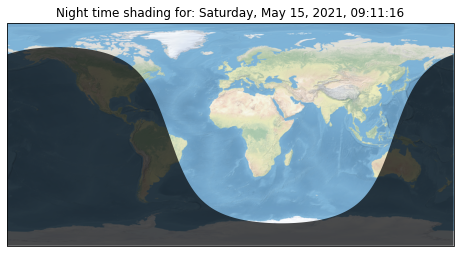

In [16]:
import datetime

fig = plt.figure(figsize=(8, 5))

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

ax.stock_img()

cur_date = datetime.datetime.now()
ax.add_feature(Nightshade(cur_date, alpha=0.7))

ax.set_title('Night time shading for: {}'.format(cur_date.strftime("%A, %B %d, %Y, %H:%M:%S")))

plt.show()

#### Choosing Different Map Projections

- <a href="https://scitools.org.uk/cartopy/docs/latest/crs/projections.html"> Cartopy Map Projection List</a>

<font color="blue">Lambert Cylindrical </font>

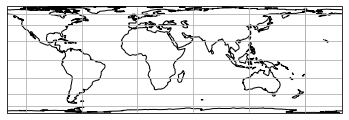

In [17]:
central_longitude = 40.0 # default value is zero

# Select the map projection
ax = plt.axes(projection=cartopy.crs.LambertCylindrical(central_longitude))

# Add cost lines
ax.add_feature(cartopy.feature.COASTLINE)
ax.gridlines()

plt.show()

<font color="blue">Mercator </font>

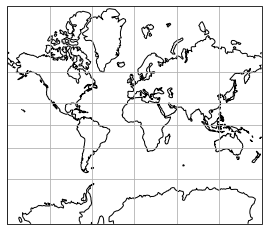

In [18]:
ax = plt.axes(projection=cartopy.crs.Mercator())
ax.add_feature(cartopy.feature.COASTLINE)
ax.gridlines()
plt.show()

<font color="blue">Orthographic</font>

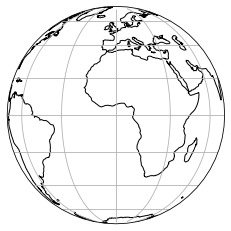

In [19]:
ax = plt.axes(projection=cartopy.crs.Orthographic())
ax.add_feature(cartopy.feature.COASTLINE)
ax.gridlines()
plt.show()

<font color="blue">Collection of Projections</font>

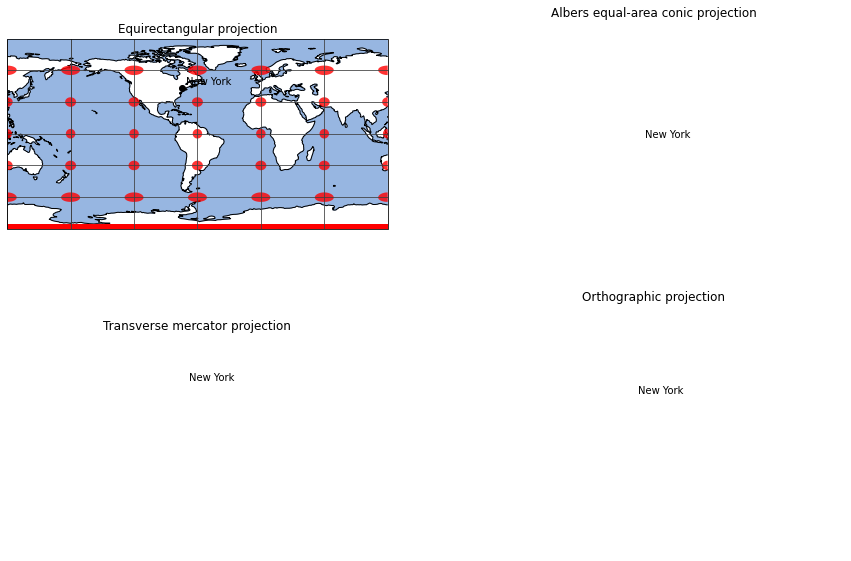

In [20]:
from cartopy.feature import OCEAN

projections = [ccrs.PlateCarree(-60), ccrs.AlbersEqualArea(-60), 
               ccrs.TransverseMercator(-60), ccrs.Orthographic(-60, 30)]
titles = ['Equirectangular projection', 
          'Albers equal-area conic projection', 
          'Transverse mercator projection', 
          'Orthographic projection']

fig, axes = plt.subplots(2, 2, 
                         subplot_kw={'projection': projections[0]}, 
                         figsize=(15,10))

ny_lon, ny_lat = -75, 43

for ax, proj, title in zip(axes.ravel(), projections, titles):
    ax.projection = proj      # Here we change projection for each subplot.
    ax.set_title(title)       # Add title for each subplot.
    ax.set_global()           # Set global extention
    ax.coastlines()           # Add coastlines
    ax.add_feature(OCEAN)     # Add oceans
    ax.tissot(facecolor='r', alpha=.8, lats=np.arange(-90,90, 30))         # Add tissot indicatrisses
    ax.plot(ny_lon, ny_lat, 'ko', transform=ccrs.Geodetic())               # Plot the point for the NY city
    ax.text(ny_lon + 4, ny_lat + 4, 'New York', transform=ccrs.Geodetic()) # Label New York
    ax.gridlines(color='.25', ylocs=np.arange(-90,90, 30))                 # Ad gridlines
plt.show()

#### Regional Map

Need to provide the longitude and latitude ranges as arguments of the `set_extent` method on the axes object:

```python
   ax.set_extent([min_lon, max_lon, min_lat, max_lat])
```

<font color="blue"> Map of the United States of America </font>

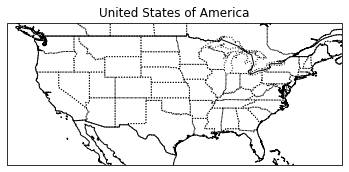

In [21]:
ax = plt.axes(projection=cartopy.crs.PlateCarree())

ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.STATES, linestyle=':')
ax.add_feature(cartopy.feature.BORDERS)

ax.set_extent([-130, -65, 24, 47])
ax.set_title("United States of America")
plt.show()

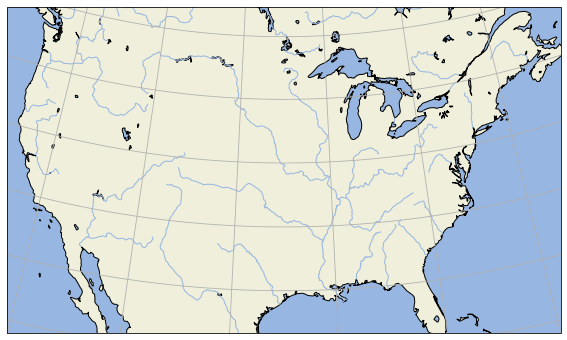

In [22]:
central_lat = 37.5
central_lon = -96
extent = [-120, -70, 24, 50.5]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon, central_lat))
ax.set_extent(extent)

ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ax.add_feature(cartopy.feature.LAKES, edgecolor='black')
ax.add_feature(cartopy.feature.RIVERS)
ax.gridlines()

## Exercise 1
Draw the map of Africa. Include the country boundaries, lakes, rivers, land, coastline.

Hint: longitude range -->(-20, 60) and latitude range -->(-40, 40)

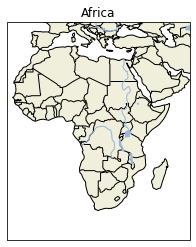

In [23]:
ax = plt.axes(projection=cartopy.crs.PlateCarree())

ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.BORDERS)
ax.add_feature(cartopy.feature.RIVERS)
ax.add_feature(cartopy.feature.LAKES)

ax.set_extent([-20, 60, -40, 40])
ax.set_title("Africa")
plt.show()

## Exercise 2

- The code below creates a Pandas dataframe that contains the latitude and longitude data of a city in each country of the world.
- Write a script that plots a map of the world, country boundaries and include a dot at each of the cities.

In [24]:
import pandas as pd

url = "https://developers.google.com/public-data/docs/canonical/countries_csv"

df = pd.read_html(url)
df = df[0]
df

country   latitude  longitude                  name
0        AD  42.546245   1.601554               Andorra
1        AE  23.424076  53.847818  United Arab Emirates
2        AF  33.939110  67.709953           Afghanistan
3        AG  17.060816 -61.796428   Antigua and Barbuda
4        AI  18.220554 -63.068615              Anguilla
..      ...        ...        ...                   ...
240      YE  15.552727  48.516388                 Yemen
241      YT -12.827500  45.166244               Mayotte
242      ZA -30.559482  22.937506          South Africa
243      ZM -13.133897  27.849332                Zambia
244      ZW -19.015438  29.154857              Zimbabwe

[245 rows x 4 columns]

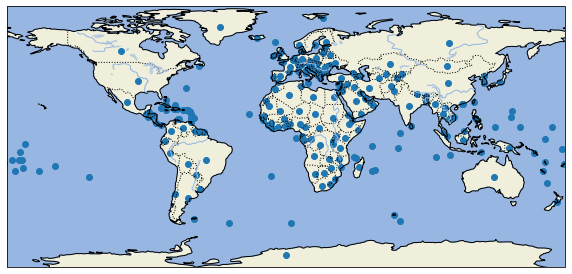

In [25]:
fig = plt.figure(figsize=(10, 7))

# Select the map projection
ax = fig.add_subplot(1, 1, 1,
                     projection=ccrs.PlateCarree())
ax.scatter(df.longitude, df.latitude)

ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)
plt.show()

## Overlaying Data

#### Line Plots on a Map

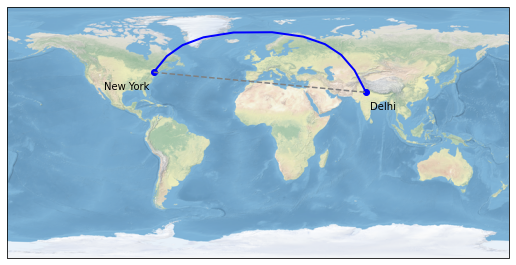

In [26]:
plt.figure(figsize=(9, 5))

map_projection = ccrs.PlateCarree()

ax = plt.axes(projection=map_projection)
ax.stock_img()

ny_lon, ny_lat = -75, 43
delhi_lon, delhi_lat = 77.23, 28.61

plt.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat],
         color='blue', linewidth=2, marker='o',
         transform=ccrs.Geodetic())

plt.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat],
         color='gray', linestyle='--',
         transform=ccrs.PlateCarree())

plt.text(ny_lon - 3, ny_lat - 12, 'New York',
         horizontalalignment='right',
         transform=ccrs.Geodetic())

plt.text(delhi_lon + 3, delhi_lat - 12, 'Delhi',
         horizontalalignment='left',
         transform=ccrs.Geodetic())

plt.show()

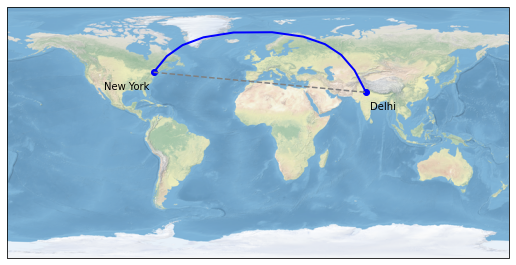

In [27]:
plt.figure(figsize=(9, 5))

map_projection = ccrs.PlateCarree()

ax = plt.axes(projection=map_projection)
ax.stock_img()

ny_lon, ny_lat = -75, 43
delhi_lon, delhi_lat = 77.23, 28.61

ax.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat],
         color='blue', linewidth=2, marker='o',
         transform=ccrs.Geodetic())

ax.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat],
         color='gray', linestyle='--',
         transform=ccrs.PlateCarree())

ax.text(ny_lon - 3, ny_lat - 12, 'New York',
         horizontalalignment='right',
         transform=ccrs.Geodetic())

ax.text(delhi_lon + 3, delhi_lat - 12, 'Delhi',
         horizontalalignment='left',
         transform=ccrs.Geodetic())

plt.show()

## Overlaying Data

#### Understanding Projection and Transform Keywords
+ The projection of your axes is independent of the coordinate system your data is defined in.
+ The `projection` argument is used when creating plots and determines the projection of the resulting plot.
+ The `transform` argument to plotting functions tells Cartopy what coordinate system your data are defined in.

### <font color="red">Simple Application</font>
In a recent trip overseas, the plane's display monitor in front of me caught my attention.
Every now and then, there was a map of the world where different cities (across all continents) were plotted together with their local times. While watching the map, I wondered how I could use Cartopy to produce a similar one.

### <font color='blue'> Only run the following cell if you are on Google Colab</font>

Uncomment the cell below if you are on Google Colab

In [ ]:
!pip install timezonefinder

In [29]:
import datetime
import pytz
import timezonefinder

def get_local_time(latitude, longitude):
    """
      Given the latitude/longitude pair, this function
      returns the current local time at the location.
    """
    tf = timezonefinder.TimezoneFinder()

    # Get the tz-database-style time zone name
    # (e.g. 'America/Vancouver') or None
    timezone_str = tf.certain_timezone_at(lat=latitude, lng=longitude)

    if timezone_str:
       # Display the current time in that time zone
       timezone = pytz.timezone(timezone_str)
       dt = datetime.datetime.utcnow()
       return (dt + timezone.utcoffset(dt)).strftime('%H:%M:%S')
    else:
       # Could not determine the time zone
       return

In [30]:
cities_names = ['Yaounde', 'London', 'New Dehli', 'Canberra', 'Ottawa', 'Buenos Aires']
latitudes    = [03.50, 51.36, 28.37, -35.15, 45.27, -36.30]
longitudes   = [11.35, -0.05, 77.13, 149.08, -75.42, -60.0]

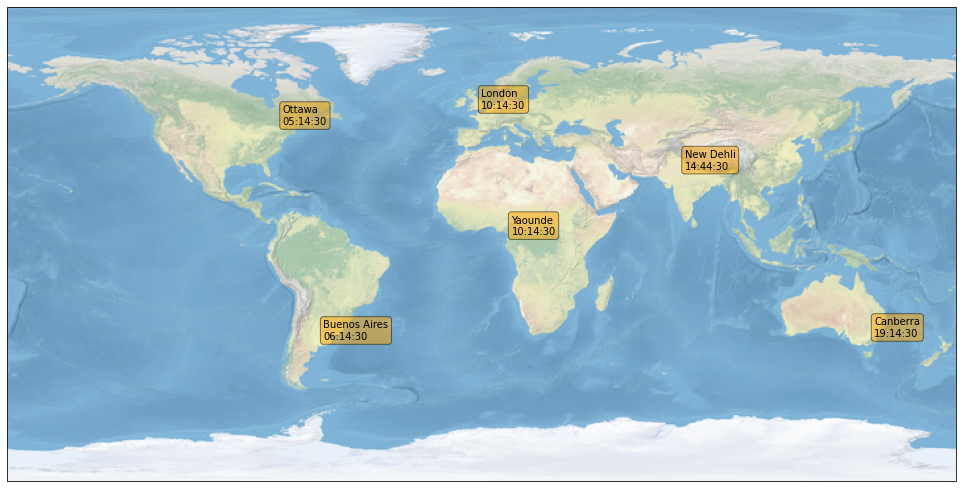

In [31]:
plt.figure(figsize=(17, 10))

map_projection = ccrs.PlateCarree()

ax = plt.axes(projection=map_projection)
ax.stock_img()

props = dict(boxstyle='round', facecolor='orange', alpha=0.5)

for i in range(len(cities_names)):
    loc_time = get_local_time(latitudes[i], longitudes[i])
    textstr = "\n".join((cities_names[i], loc_time))
    plt.text(longitudes[i], latitudes[i], textstr, bbox=props,
             transform=ccrs.Geodetic())

plt.show()

### Basic Map

In [32]:
nlats, nlons = 73, 145
lats = np.linspace(-np.pi / 2, np.pi / 2, nlats)
lons = np.linspace(0, 2 * np.pi, nlons)

# Create a mesh grid
lons, lats = np.meshgrid(lons, lats)
wave = 0.75 * (np.sin(2 * lats) ** 8) * np.cos(4 * lons)
mean = 0.5 * np.cos(2 * lats) * ((np.sin(2 * lats)) ** 2 + 2)

lats = np.rad2deg(lats)
lons = np.rad2deg(lons)
data = wave + mean

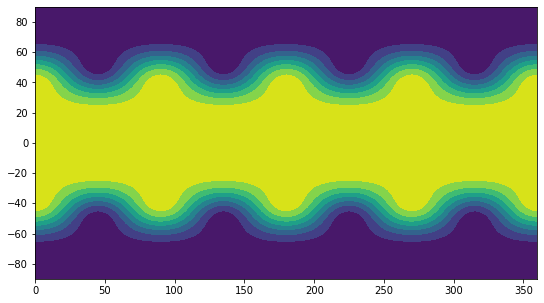

In [33]:
fig = plt.figure(figsize=(9, 5))
ax = fig.add_subplot(1, 1, 1)
ax.contourf(lons, lats, data)

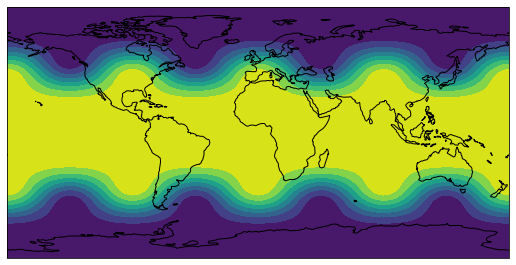

In [34]:
plt.figure(figsize=(9, 5))

map_projection = ccrs.PlateCarree()
ax = plt.axes(projection=map_projection)
ax.contourf(lons, lats, data)
ax.coastlines()
ax.set_global()
plt.show()

#### Adding Latitude/Longitude Ticks

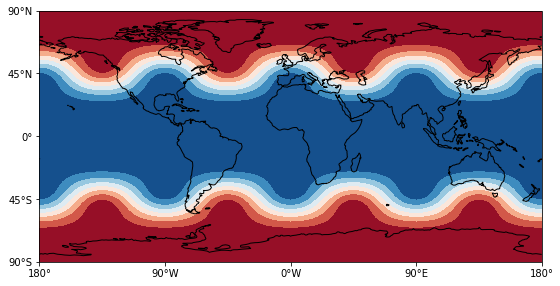

In [35]:
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

plt.figure(figsize=(9, 5))
map_projection = ccrs.PlateCarree()
ax = plt.axes(projection=map_projection)
ax.contourf(lons, lats, data, cmap='RdBu')
ax.coastlines()

ax.set_xticks(np.linspace(-180, 180, 5), crs=map_projection)
ax.set_yticks(np.linspace(-90, 90, 5), crs=map_projection)

lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

#ax.set_global()
plt.show()

#### Adding Colorbar

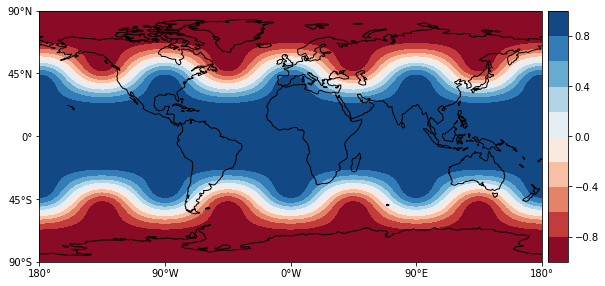

In [36]:
fig = plt.figure(figsize=(9, 5))
map_projection = ccrs.PlateCarree()
ax = plt.axes(projection=map_projection)
clevs = [-1.0, -0.7, -0.45, -0.16, 0.5, 0.7]
im = ax.contourf(lons, lats, data, levels=10, cmap='RdBu', transform=map_projection)
ax.coastlines()

ax.set_xticks(np.linspace(-180, 180, 5), crs=map_projection)
ax.set_yticks(np.linspace(-90, 90, 5), crs=map_projection)
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

# Create an axes for colorbar. 
# The position of the axes is calculated based on the position of ax.
# You can change dspace to adjust the distance between the main image and the colorbar.
# You can change dwidth to adjust the width of the colorbar.
# This practice is universal for both subplots and GeoAxes.
dspace = 0.01
dwidth = 0.03
cax = fig.add_axes([ax.get_position().x1 + dspace,
                    ax.get_position().y0,  dwidth,
                    ax.get_position().height])
plt.colorbar(im, cax=cax)


ax.set_global()
plt.show()

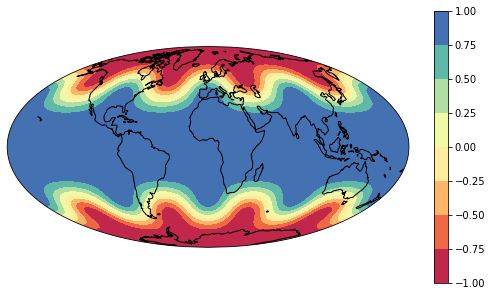

In [37]:
plt.figure(figsize=(9, 5))
ax = plt.axes(projection=ccrs.Mollweide())
im = ax.contourf(lons, lats, data, \
            transform=ccrs.PlateCarree(), \
            cmap='Spectral')
ax.coastlines()

cax = fig.add_axes()
plt.colorbar(im, cax=cax)


ax.set_global()
plt.show()

### Example: Converting a Basemap Script into a Cartopy Script

The main differences between Cartopy and Basemap are:

1) The way they create plotting axes

     - Basemap: create the Basemap instance.
     - Cartopy: create the plotting axis by passing the projection to the axes constructor.

2) The way the set the plot extent

     - Basemap: pass the x,y corners of the plot either as lon,lat values for the upper right and lower left corners, or as a width and height in x,y units.
     - Cartopy: pass the x,y corners using for instance the set_extent method.

**Basemap**
```python
fig = plt.figure(num=None, figsize=(8,5), facecolor='w')
text1=''
fig.text(0.45, 0.93, text1,color='b')

cxcoord4  = [0.91, 0.2, 0.015, 0.6]

m = Basemap(projection='cyl',\
    llcrnrlon=lon_1,llcrnrlat=lat_01,urcrnrlon=lon_2,urcrnrlat=lat_02,\
    lat_0=cen_lat,lon_0=cen_lon,lat_1=truelat1,lat_2=truelat2,suppress_ticks=False)

x, y = m(-98.3125, 48.8125)
plt.plot(x, y, 'ok', markersize=5)
x, y = m(-72.31250, 41.9375)
plt.plot(x, y, 'ok', markersize=5)

m.drawcoastlines(color='grey')
m.drawcountries(color='grey')
m.drawstates(color='grey')

clev=np.arange(Tmin,Tmax+1,1)
jet = plt.get_cmap('jet')
cs = plt.contourf(lon0,lat0,var1,clev,cmap=jet,extend='neither')
plt.title('')
cx  = fig.add_axes(cxcoord4)
cbar=plt.colorbar(cs,cax=cx,orientation='vertical',
                  ticks=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
```

**Cartopy**
```python
def get_indices(my_array, my_list):
    list_indices = []
    for item in  my_list:
        list_indices.append((np.abs(my_array - item)).argmin())
    return list_indices

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Add coastline, borders and states
ax.add_feature(cartopy.feature.COASTLINE, edgecolor='grey')
ax.add_feature(cartopy.feature.BORDERS,   edgecolor='grey')
ax.add_feature(cartopy.feature.STATES,    edgecolor='grey')

# Plot specific points
#---------------------
i = get_indices(lon0[0,:], [-98.3125, -72.31250])
j = get_indices(lat0[:,0], [48.8125, 41.9375])
plt.plot(lon0[0,i],lat0[j,0], 'ok', markersize=5)

# Contour plot and Colorbar
#-------------------------
clev=np.arange(Tmin,Tmax+1,1)
jet = plt.get_cmap('jet')
cs = ax.contourf(lon0,lat0,var1,clev,cmap=jet,extend='neither', transform=ccrs.PlateCarree())
plt.title('')
cx  = fig.add_axes(cxcoord4)
cbar=plt.colorbar(cs,cax=cx,orientation='vertical',
                  ticks=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])

# set the extent of the plot
#---------------------------
ax.set_extent([lon_1, lon_2, lat_01, lat_02], crs=ccrs.PlateCarree())

```

## Exercise 2

Use the following:

```python
    lon = np.linspace(-80, 80, 25) 
    lat = np.linspace(30, 70, 25)   
    lon2d, lat2d = np.meshgrid(lon, lat)
    data = np.cos(np.deg2rad(lat2d) * 4) + np.sin(np.deg2rad(lon2d) * 4)
```

to plot `data` on a Orthographic projection centered in Mexico.

## Using Images

### <font color='blue'> Only run the following cell if you are on Google Colab</font>

Uncomment the cell below if you are on Google Colab

In [ ]:
!pip install owslib

In [39]:
### This function is meant to replace an internal Python function ###

from owslib.wmts import TileMatrixSetLink, TileMatrixLimits
from owslib.wmts import _TILE_MATRIX_SET_TAG, _TILE_MATRIX_SET_LIMITS_TAG
from owslib.wmts import _TILE_MATRIX_LIMITS_TAG

def custom_from_elements(link_elements):
    links = []
    for link_element in link_elements:
        matrix_set_elements = link_element.findall(_TILE_MATRIX_SET_TAG)
        if len(matrix_set_elements) == 0:
            raise ValueError('Missing TileMatrixSet in %s' % link_element)
        elif len(matrix_set_elements) > 1:
            set_limits_elements = link_element.findall(
                _TILE_MATRIX_SET_LIMITS_TAG)
            if set_limits_elements:
                raise ValueError('Multiple instances of TileMatrixSet'
                                  ' plus TileMatrixSetLimits in %s' %
                                  link_element)
            for matrix_set_element in matrix_set_elements:
                uri = matrix_set_element.text.strip()
                links.append(TileMatrixSetLink(uri))
        else:
            uri = matrix_set_elements[0].text.strip()

            tilematrixlimits = {}
            path = '%s/%s' % (_TILE_MATRIX_SET_LIMITS_TAG,
                              _TILE_MATRIX_LIMITS_TAG)
            for limits_element in link_element.findall(path):
                tml = TileMatrixLimits(limits_element)
                if tml.tilematrix:
                    tilematrixlimits[tml.tilematrix] = tml

            links.append(TileMatrixSetLink(uri, tilematrixlimits))
    return links

TileMatrixSetLink.from_elements = custom_from_elements

<font color="blue">Remote Image</font>

Example 1:

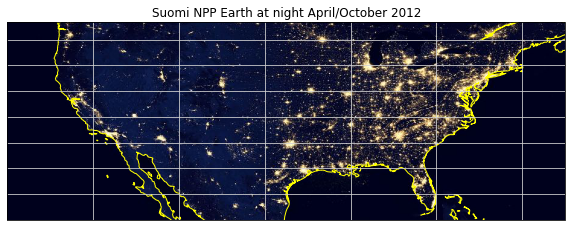

In [40]:
# Define resource for the NASA night-time illumination data.

base_uri = 'http://map1c.vis.earthdata.nasa.gov/wmts-geo/wmts.cgi'
layer_name = 'VIIRS_CityLights_2012'

#eng_boundingbox = [-6, 3, 48, 58]
usa_boundingbox = [-130, -65, 24, 47]

# Create a Cartopy crs for plain and rotated lat-lon projections.
plain_crs = ccrs.PlateCarree()

fig = plt.figure(figsize=(10, 7))

# Plot WMTS data in a specific region, over a plain lat-lon map.
ax = fig.add_subplot(1, 1, 1, projection=plain_crs)
ax.set_extent(usa_boundingbox, crs=ccrs.PlateCarree())
ax.coastlines(resolution='50m', color='yellow')
ax.gridlines(color='lightgrey', linestyle='-')
# Add WMTS imaging.
ax.add_wmts(base_uri, layer_name=layer_name)

ax.set_title('Suomi NPP Earth at night April/October 2012')

plt.show()

Example 2:

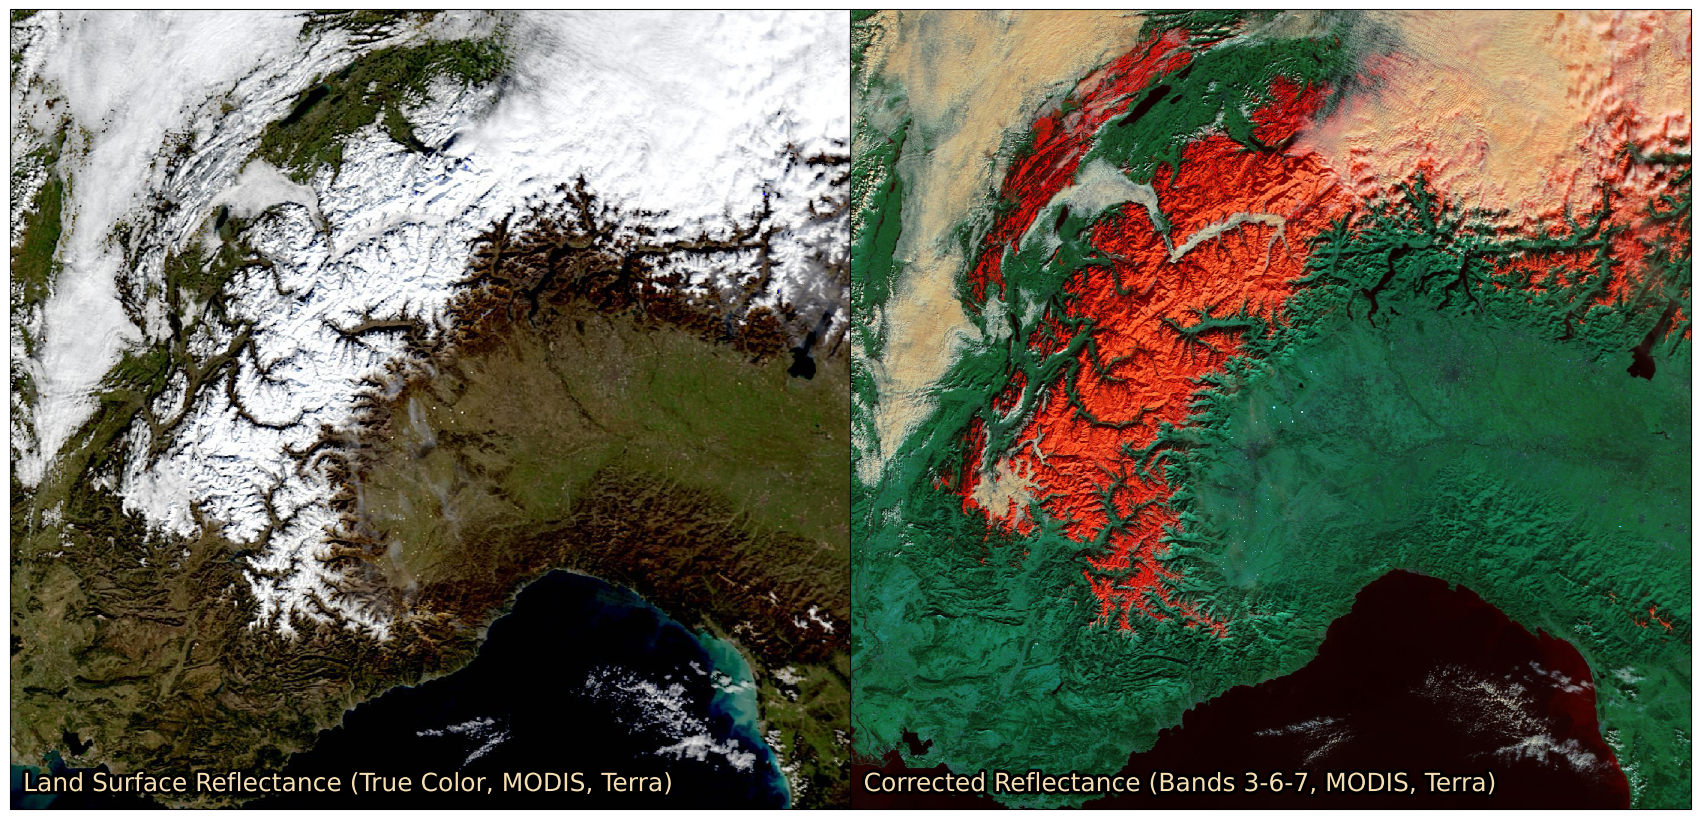

In [41]:
import matplotlib.patheffects as PathEffects
from owslib.wmts import WebMapTileService

# URL of NASA GIBS
URL = 'https://gibs.earthdata.nasa.gov/wmts/epsg4326/best/wmts.cgi'
wmts = WebMapTileService(URL)

# Layers for MODIS true color and snow RGB
layers = ['MODIS_Terra_SurfaceReflectance_Bands143',
          'MODIS_Terra_CorrectedReflectance_Bands367']

date_str = '2016-02-05'

# Plot setup
plot_CRS = ccrs.Mercator()
geodetic_CRS = ccrs.Geodetic()
x0, y0 = plot_CRS.transform_point(4.6, 43.1, geodetic_CRS)
x1, y1 = plot_CRS.transform_point(11.0, 47.4, geodetic_CRS)
ysize = 8
xsize = 2 * ysize * (x1 - x0) / (y1 - y0)
fig = plt.figure(figsize=(xsize, ysize), dpi=100)

for layer, offset in zip(layers, [0, 0.5]):
    ax = fig.add_axes([offset, 0, 0.5, 1], projection=plot_CRS)
    ax.set_xlim((x0, x1))
    ax.set_ylim((y0, y1))
    ax.add_wmts(wmts, layer, wmts_kwargs={'time': date_str})
    txt = ax.text(4.7, 43.2, wmts[layer].title, fontsize=18, 
                  color='wheat', transform=geodetic_CRS)
    txt.set_path_effects([PathEffects.withStroke(linewidth=5,
                                                 foreground='black')])
plt.show()


<font color="blue">Satellite Image</font>

In [42]:
# Get the remote file
from urllib.request import urlopen
from PIL import Image
url = "https://lance-modis.eosdis.nasa.gov/imagery/gallery/2012270-0926/Miriam.A2012270.2050.2km.jpg"

img = Image.open(urlopen(url))

print("Type of object: ", type(img))
print("Image size:     ", img.size)

Type of object:  <class 'PIL.JpegImagePlugin.JpegImageFile'>
Image size:      (750, 975)


**Information on the file:** <a href="https://lance.modaps.eosdis.nasa.gov/imagery/gallery/2012270-0926/Miriam.A2012270.2050.txt">Tropical Storm Miriam (13E) off Mexico</a>
 
| Key  | Value |
| --- | --- |
| region | Pa | 
| sat | Aqua | 
| projection |Plate Carree | 
| projection center lon |-113.5000 | 
| projection center lat | +22.0000 | 
| image center lon | -113.5 | 
| image center lat | +22 | 
| standard parallel | +20.0000 | 
| UL lon |-120.6766 | 
| UL lat |+30.7669 | 
| UR lon | -106.3210 | 
| UR lat | +30.7669 | 
| LR lon | -106.3210 | 
| LR lat | +13.2301 | 
| LL lon | -120.6766 | 
| LL lat | +13.2301 | 
| UL easting (km) | -749.8750 | 
| UL northing (km) | +3421.1250 | 
| x scale factor | +0.9396926207859084 | 
| ellipsoid | WGS84 | 
| Contact | Jeff Schmaltz | 
| L2 granules | A122702045 A122702050 | 

Text(-117, 33, 'San Diego')

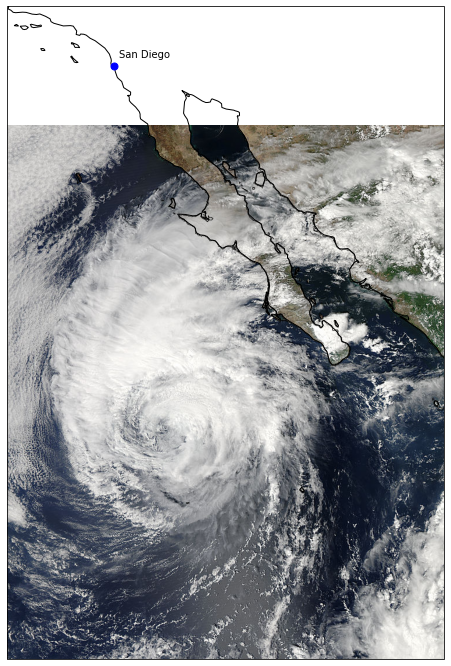

In [43]:
fig = plt.figure(figsize=(8, 12))

img_extent = (-120.67660000000001, -106.32104523100001, \
              13.2301484511245, 30.766899999999502)

ax = plt.axes(projection=ccrs.PlateCarree())

# set a margin around the data
ax.set_xmargin(0.05)
ax.set_ymargin(0.10)

# add the image. Because this image was a tif, the "origin" of 
# the image is in the
# upper left corner
ax.imshow(img, origin='upper', extent=img_extent, \
          transform=ccrs.PlateCarree())
ax.coastlines(resolution='50m', color='black', linewidth=1)

# mark a known place to help us geo-locate ourselves
ax.plot(-117.1625, 32.715, 'bo', markersize=7, transform=ccrs.Geodetic())
ax.text(-117, 33, 'San Diego', transform=ccrs.Geodetic())

## Exercise 3
We want to use the netCDF file:

https://www.unidata.ucar.edu/software/netcdf/examples/sresa1b_ncar_ccsm3-example.nc

to plot the surface air temperature (variable `tas`).

* The code below obtains the netCDF file and extracts the variable `tas`.
* You need to use cartopy to do a contour plot and add the colorbar.

The metadata of the file is located at:

https://www.unidata.ucar.edu/software/netcdf/examples/sresa1b_ncar_ccsm3-example.cdl

### <font color='blue'> Only run the following cell if you are on Google Colab</font>

Uncomment the cell below if you are on Google Colab

In [ ]:
!pip install netCDF4

In [45]:
!ls

sample_data


In [46]:
# Get the remote  file
import urllib.request
import os

url = "https://www.unidata.ucar.edu/software/netcdf/examples/sresa1b_ncar_ccsm3-example.nc"

nc_file = os.path.basename(url)
urllib.request.urlretrieve(url, nc_file)

('sresa1b_ncar_ccsm3-example.nc', <http.client.HTTPMessage at 0x7fc1152c7f50>)

**`ncdump -h` the netCDF file**

In [ ]:
import netCDF4 as nc4
import numpy as np

def my_ncdump(file_name):
    with nc4.Dataset(file_name, mode='r') as ncfid:
         for name, var in ncfid.variables.items():
             print("{}:".format(name))
             print("{:>20}: {}".format("Dimension", var.dimensions))
             print("{:>20}: {}".format("Dimension value", var.shape))
             print("{:>20}: {}".format("Type", var.dtype))
             for attr in var.ncattrs():
                 print("{:>20}: {}".format(attr, var.getncattr(attr)))
         print()
         print("Global attributes")
         for attr in ncfid.ncattrs():
             print("{:>20}: {}".format(attr, ncfid.getncattr(attr)))
                
my_ncdump(nc_file)

**Read the netCDF file**

In [48]:
# Open the netCDF file and read surface air temperature
from netCDF4 import Dataset
import numpy as np
with Dataset(nc_file,'r') as ncid:
     lons = ncid.variables['lon'][:] # longitude grid points
     lats = ncid.variables['lat'][:] # latitude grid points
     surf_temp = ncid.variables['tas'][0] 

print("Shape of lons:      ", np.shape(lons), lons[0], lons[-1])
print("Shape of lats:      ", np.shape(lats), lats[0], lats[-1])
print("Shape of surf_temp: ", np.shape(surf_temp))

Shape of lons:       (256,) 0.0 358.59375
Shape of lats:       (128,) -88.927734 88.927734
Shape of surf_temp:  (128, 256)


**Use `Cartopy` to do a contour plot**

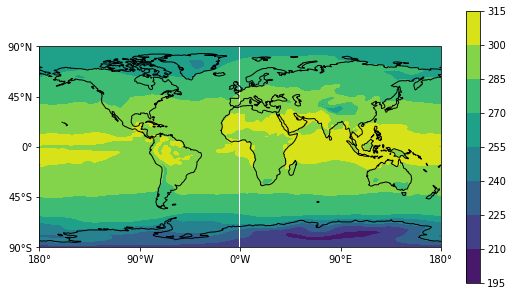

In [49]:
plt.figure(figsize=(9, 5))
map_projection = ccrs.PlateCarree()
ax = plt.axes(projection=map_projection)

im = ax.contourf(lons, lats, surf_temp, transform=map_projection)
ax.coastlines()

ax.set_xticks(np.linspace(-180, 180, 5), crs=map_projection)
ax.set_yticks(np.linspace(-90, 90, 5),   crs=map_projection)
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

plt.colorbar(im, orientation='vertical')

ax.set_global()
plt.show()

**Remove the equatorial line**

- Make sure that we cycle the longitude

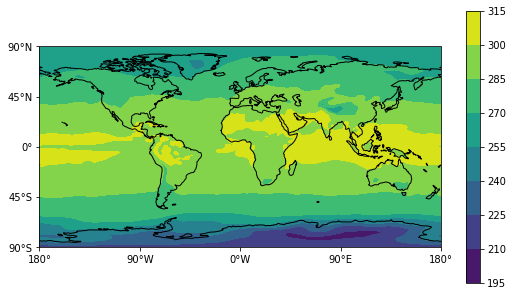

In [50]:
import cartopy.util

plt.figure(figsize=(9, 5))
map_projection = ccrs.PlateCarree()
ax = plt.axes(projection=map_projection)

surf_temp, lons = cartopy.util.add_cyclic_point(surf_temp, 
                                                coord=lons)

im = ax.contourf(lons, lats, surf_temp, transform=map_projection)
ax.coastlines()

ax.set_xticks(np.linspace(-180, 180, 5), crs=map_projection)
ax.set_yticks(np.linspace(-90, 90, 5),   crs=map_projection)
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

plt.colorbar(im, orientation='vertical')

ax.set_global()
plt.show()

# <font color="red"> Cartopy and Shapefile Files</font>

## What is Shapefile?

The shapefile format:
* Is a digital vector storage format for storing geometric location and associated attribute information.
* Geographic features in a shapefile can be represented by points, lines, or polygons (areas).
* Is non-topological. It does not maintain spatial relationship information such as connectivity, adjacency, and area definition.
* Because the structure of points, lines, and polygons are different, each individual shapefile can only contain one vector type (all points, all lines or all polygons). You will not find a mixture of point, line and polygon objects in a single shapefile.
* Was introduced with ArcView GIS version 2 in the early 1990s.

#### Representation of the geographic features of a shapefile

![features](https://www.earthdatascience.org/images/courses/earth-analytics/spatial-data/points-lines-polygons-vector-data-types.png)
Image Source: Colin Williams (NEON)


## Content of Shapefile Files

Every shapefile data set includes at least three files:

* **.shp**: The main file that contains the primary geographic reference data and records of various shape types included, such as points, polygons, or multipatches.
* **.dbf**: The dBase file that stores attributes for each shape. It alows quicker access to the spatial features of the data.
* **.shx**: Organize the records of a shapefile for reference.

These files need to have the same name and to be stored in the same directory (folder).

Sometimes, a shapefile will have other associated files including:

* **.prj**: Contains information on projection format including the coordinate system and projection information. It is a plain text file describing the projection using well-known text (WKT) format.
* **.sbn** and **.sbx**: the files that are a spatial index of the features.
* **.shp.xml**: the file that is the geospatial metadata in XML format, (e.g. ISO 19115 or XML format).

#### Spatial Data Attributes

- Each object in a shapefile has one or more attributes associated with it. 
- Shapefile attributes are similar to fields or columns in a spreadsheet. 
- Each row in the spreadsheet has a set of columns associated with it that describe the row element.
- Attribute data are stored in the **.dbf** file. 

![attributes](https://www.earthdatascience.org/images/courses/earth-analytics/spatial-data/spatial-attribute-tables.png)
Image Source: National Ecological Observatory Network (NEON)

<font color="blue"> EXAMPLE: Color all the "counties" in Belgium</font>

In [ ]:
# Obtain the remote shapefile files
import urllib.request

url = 'https://raw.githubusercontent.com/astg606/py_materials/master/visualization/borders/'

file_list = ["BEL_adm3.csv", "BEL_adm3.dbf", "BEL_adm3.prj", "BEL_adm3.shp", "BEL_adm3.shx"]

for file in file_list:
    urllib.request.urlretrieve(url+file, file)

In [ ]:
subplot_kw = dict(projection=ccrs.PlateCarree())

fig, ax = plt.subplots(figsize=(13, 11),
                       subplot_kw=subplot_kw)

# Create a map of Europe
#---------------------------
lower_lon = -5.0
upper_lon = 15.
lower_lat = 45.
upper_lat = 54.

ax.set_extent([lower_lon, upper_lon, lower_lat, upper_lat])

# Put a background image on for nice sea rendering.
ax.stock_img()

ax.add_feature(cfeature.BORDERS, linestyle=':')
#ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)

# Get the shapes  (from the shp file) and 
#         records (from the dbf files)
# ---------------------------------------
reader = shapereader.Reader('BEL_adm3')

# The read shapefile method allows you to call the shapefile's shapes and info. 
# Both are lists, the first containing a list of tuples (coordinates), 
# and the second containig a dictionary with associated metadata

# Plots the shapes as Polygons with a random facecolor
for country in reader.geometries():
    ax.add_geometries([country], ccrs.PlateCarree(), \
                      facecolor=cm.jet(np.random.rand()), \
                      edgecolor='black')
    
plt.show()

## Cartopy and the Natural Earth Dataset

* Cartopy provides an interface for access to frequently used data such as the <a href="https://www.ngdc.noaa.gov/mgg/shorelines/gshhs.html">GSHHS</a> dataset and from the <a href="http://www.naturalearthdata.com">NaturalEarthData</a> website. 
* These interfaces allow the user to define the data programmatically, and if the data does not exist on disk, it will be retrieved from the appropriate source (normally by downloading the data from the internet).

**You can use the Natural Earth Data database to have higher-resolution features:**

In [ ]:
central_lat = 37.5
central_lon = -96
extent = [-120, -70, 24, 50.5]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

rivers_50m = cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '50m')

plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon, central_lat))
ax.set_extent(extent)

ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
#ax.add_feature(cartopy.feature.RIVERS, edgecolor='b')
ax.add_feature(rivers_50m, facecolor='None', edgecolor='b')
ax.gridlines()

In [ ]:
fig = plt.figure(figsize=(12, 5))
# ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([80, 170, -45, 30], crs=ccrs.PlateCarree())

# Put a background image on for nice sea rendering.
ax.stock_img()

# Create a feature for States/Admin 1 regions at 1:50m from Natural Earth
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(states_provinces, edgecolor='gray')

plt.show()

**To acquire the countries dataset from Natural Earth, we may use:**

In [ ]:
import cartopy.io.shapereader as shapereader
 
shpfilename = shapereader.natural_earth(resolution='110m', \
                                      category='cultural', \
                                      name='admin_0_countries')

The function `Reader` provides an interface for accessing the contents of a shapefile. It returns an instance that has two primary methods:

* **geometries()**: Returns an iterator of shapely geometries from the shapefile.
* **records()**: Returns an iterator of Record (entry of the file that combines attributes with their associated geometry) instances.

In [ ]:
reader = shapereader.Reader(shpfilename)
countries = reader.records()
country = next(countries)

In [ ]:
print(type(country.attributes))

In [ ]:
for key in country.attributes:
    print("{:} --> {:>}".format(key, country.attributes[key]))

<font color="blue"> EXAMPLE: Map the Globe and Color the United States</font>

In [ ]:
# Select the map projection
#----------------------
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.OCEAN)
 
# Select the area of interest
#-----------------------
ax.set_extent([-130, -65, 24, 47])
 
for country in countries:
    if country.attributes['ADM0_A3'] == 'USA':
        ax.add_geometries(country.geometry, \
                          ccrs.PlateCarree(), \
                          facecolor=(0, 0, 1),
                          label=country.attributes['ADM0_A3'])
    else:
        ax.add_geometries(country.geometry, ccrs.PlateCarree(),
                          facecolor=(0, 1, 0), \
                          label=country.attributes['ADM0_A3'])
 
plt.show()

### Exercise:
Draw the USA map and randomly color each state.

You may want to use:

```python
shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shapereader.natural_earth(resolution='110m',
                                       category='cultural',
                                       name=shapename)

reader = shapereader.Reader(states_shp)
```

### <font color="blue"> EXAMPLE: Select the country Cameroon and color each of its administrative region with a different color </font>

In [ ]:
from matplotlib.colors import cnames
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

# Read the Natural Earth shapefile dataset
#----------------------------------
kw = dict(resolution='10m', category='cultural', \
          name='admin_1_states_provinces')
states_shp = shapereader.natural_earth(**kw)
shp = shapereader.Reader(states_shp)
 
# Select the map projection
#----------------------
subplot_kw = dict(projection=ccrs.PlateCarree())
 
fig, ax = plt.subplots(figsize=(7, 11), subplot_kw=subplot_kw)
 
# Select the area that includes Cameroon
#----------------------------------
ax.set_extent([7.85, 17.05, 1.475, 13.50])
#ax.set_extent([7.5, 17.5, 1.25, 15])

ax.background_patch.set_visible(False)
ax.outline_patch.set_visible(False)
 
# Get from Matplotlib a list of colors
#------------------------------
colors = list(cnames.keys())
len_colors = len(colors)
 
k = 0
for record, state in zip(shp.records(), shp.geometries()):
    if record.attributes['admin'] == 'Cameroon':
        if k+1 == len_colors:
            k = 0
        else:
            k += 1
        facecolor = colors[k]
        ax.add_geometries([state], ccrs.PlateCarree(), \
                      facecolor=facecolor, edgecolor='black')
    else:
        facecolor = 'LightGray'
#    ax.add_geometries([state], ccrs.PlateCarree(), \
#                      facecolor=facecolor, edgecolor='black')
 
plt.show()